In [1]:
from matplotlib import pyplot as plt
import numpy as np 
from os.path import join, abspath 
from hammer import Model
from time import time
import vaex
from scipy.integrate import simps
current = abspath("")
root_dir = abspath(join(current, '..'))
root_data_dir = join(root_dir, "Data")
import sys
if not root_dir in sys.path: 
    sys.path.append(root_dir)

In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [3]:
from utils import plot_chain, plot_corner, style, concat

style('ggplot')

In [4]:
baryon_dir = join(root_data_dir, "Baryon")
baryon_dir
# load baryons components
df_baryon = vaex.open(join(baryon_dir, "baryon.hdf5"))
df_baryon

#,components,rho,e_rho,sigma_z,e_sigma_z
0,Molecular gas (H2),0.0104,0.00312,3.7,0.2
1,Cold atomic gas (HI(1)),0.0277,0.00554,7.1,0.5
2,Warm atomic gas (HI(2)),0.0073,0.0007,22.1,2.4
3,Hot ionized gas (HII),0.0005,3e-05,39.0,4.0
4,Giant stars,0.0006,6e-05,15.5,1.6
...,...,...,...,...,...
7,4 < MV < 5,0.0029,0.00029,18.0,1.8
8,5 < MV < 8,0.0072,0.00072,18.5,1.9
9,MV > 8,0.0216,0.0028,18.5,4.0
10,White dwarfs,0.0056,0.001,20.0,5.0


## Sample

In [5]:
# Baryonic density, check table 1 from this https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.121.081101
sigmaz = df_baryon["sigma_z"].to_numpy() # km/s
rhob = np.array(df_baryon["rho"].to_numpy())  # Msun/pc^3
rhoDM = 0.02
log_nu0 = 0
zsun = 10
R = 3.4E-3
w0 = -7
sigmaw1 = 5
sigmaw2 = 10
log_sigmaw = np.log(sigmaw1)
q_sigmaw = sigmaw1/sigmaw2
a1 = 1
a2 = 0.1
a = a1+a2
log_a = np.log(a)
q_a = a1/a
theta = concat(sigmaz, rhob, rhoDM, log_nu0, zsun, R, w0, log_sigmaw, q_sigmaw, log_a, q_a)
theta.shape, theta

((33,),
 array([ 3.70000000e+00,  7.10000000e+00,  2.21000000e+01,  3.90000000e+01,
         1.55000000e+01,  7.50000000e+00,  1.20000000e+01,  1.80000000e+01,
         1.85000000e+01,  1.85000000e+01,  2.00000000e+01,  2.00000000e+01,
         1.04000000e-02,  2.77000000e-02,  7.30000000e-03,  5.00000000e-04,
         6.00000000e-04,  1.80000000e-03,  1.80000000e-03,  2.90000000e-03,
         7.20000000e-03,  2.16000000e-02,  5.60000000e-03,  1.50000000e-03,
         2.00000000e-02,  0.00000000e+00,  1.00000000e+01,  3.40000000e-03,
        -7.00000000e+00,  1.60943791e+00,  5.00000000e-01,  9.53101798e-02,
         9.09090909e-01]))

In [6]:
N = 5000

z = np.random.randn(N)*200
w = np.random.randn(N)*15
dz = 1
pos = np.array([z, w]).T
pos.shape

(5000, 2)

In [7]:
pot = Model.DM.fzw(pos, theta, dz)
pot.shape

(5000,)

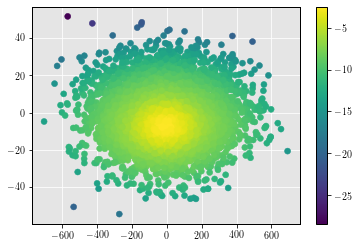

In [8]:
plt.figure(figsize=(6, 4))
plt.scatter(pos[:, 0], pos[:, 1], c=np.log(pot), cmap='viridis')
plt.colorbar()

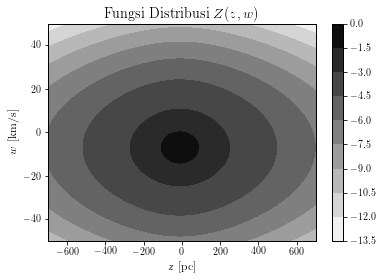

In [9]:
z = np.linspace(-700, 700, 100)
w = np.linspace(-50, 50, 100)

W, Z = np.meshgrid(w, z)
pos = np.array([Z.flatten(), W.flatten()]).T

fzw = Model.DM.fzw(pos, theta, dz)
fzw = fzw.reshape(100, 100)

plt.figure(figsize=(6, 4))
plt.contourf(Z, W, np.log10(fzw), cmap='binary')
plt.colorbar()
plt.xlabel(r'$z$ [pc]')
plt.ylabel(r'$w$ [km/s]')
plt.title(r'Fungsi Distribusi $Z(z,w)$')
# plt.savefig(join("img", "fzw.pdf"), dpi=70)
plt.show()


In [10]:
# number of walkers
N = 16

z = np.random.randn(N)*200
w = np.random.randn(N)*20
dz = 1
pos = np.array([z, w]).T
pos.shape

(16, 2)

In [11]:
nwalkers = pos.shape[0]
ndim = pos.shape[1]

t0 = time()
chain = Model.DM.sample(20_000, nwalkers, pos, theta, dz=1., verbose=True, parallel=True)
print(time() - t0, "s")

40.43024301528931 s


100%|██████████| 2/2 [00:00<00:00, 42.34it/s]


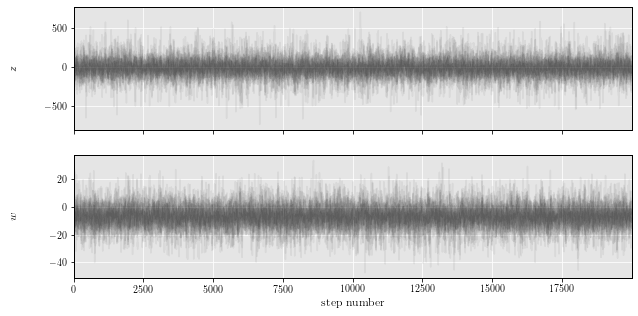

In [19]:
plot_chain(
    chain,
    labels=[r'$z$', r'$w$'],
    figsize=(10, 5),
    alpha=0.05,
) 

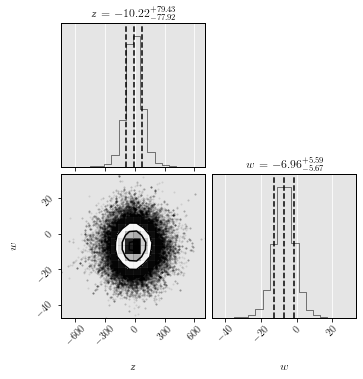

In [20]:
plot_corner(
    params=chain,
    labels=[r'$z$', r'$w$'],
    burn=100,
) 

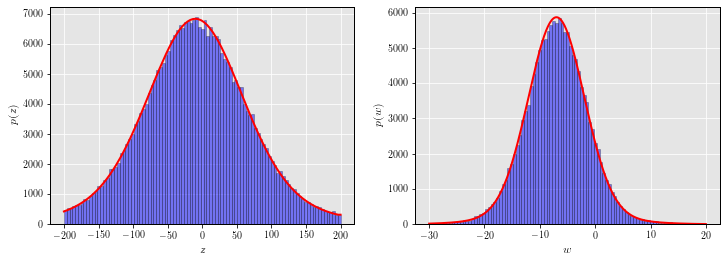

In [21]:
z_sample = chain[:, :, 0].flatten()
w_sample = chain[:, :, 1].flatten()
mask = (z_sample > -50) & (z_sample < 50)
w_sample = w_sample[mask]

z_edge = np.linspace(-200, 200, 100)
dz = z_edge[1] - z_edge[0]
z_mid = (z_edge[:-1] + z_edge[1:])/2
z_num, _ = np.histogram(z_sample, bins=z_edge)
ztot = simps(z_num, z_mid)
zs = np.linspace(z_edge.min(), z_edge.max(), 1000)
fz = Model.DM.fz(zs, theta, dz)
fz = fz * ztot / simps(fz, zs)

w_edge = np.linspace(-30, 20, 100)
dw = w_edge[1] - w_edge[0]
w_mid = (w_edge[:-1] + w_edge[1:])/2
w_num, _ = np.histogram(w_sample, bins=w_edge)
wtot = simps(w_num, w_mid)
ws = np.linspace(w_edge.min(), w_edge.max(), 1000)
fw = Model.DM.fw(ws, theta)
fw = fw * wtot / simps(fw, ws)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].bar(z_mid, z_num, width=dz, color='b', alpha=0.5, ec="k")
axes[0].plot(zs, fz, color='r', lw=2)
axes[0].set_xlabel(r'$z$')
axes[0].set_ylabel(r'$p(z)$')
axes[1].bar(w_mid, w_num, width=dw, color='b', alpha=0.5, ec="k")
axes[1].plot(ws, fw, color='r', lw=2)
axes[1].set_xlabel(r'$w$')
axes[1].set_ylabel(r'$p(w)$')
plt.show()

# run 1 million times

run it in a script

# LOAD

In [1]:
from matplotlib import pyplot as plt
import numpy as np 
from os.path import join, abspath 
from hammer import Model
from time import time
import vaex
from scipy.integrate import simps
current = abspath("")
root_dir = abspath(join(current, '..'))
root_data_dir = join(root_dir, "Data")
import sys
if not root_dir in sys.path: 
    sys.path.append(root_dir)

In [2]:
from utils import plot_chain, plot_corner, style, concat

style('ggplot')

In [3]:
baryon_dir = join(root_data_dir, "Baryon")
baryon_dir
# load baryons components
df_baryon = vaex.open(join(baryon_dir, "baryon.hdf5"))
df_baryon

#,components,rho,e_rho,sigma_z,e_sigma_z
0,Molecular gas (H2),0.0104,0.00312,3.7,0.2
1,Cold atomic gas (HI(1)),0.0277,0.00554,7.1,0.5
2,Warm atomic gas (HI(2)),0.0073,0.0007,22.1,2.4
3,Hot ionized gas (HII),0.0005,3e-05,39.0,4.0
4,Giant stars,0.0006,6e-05,15.5,1.6
...,...,...,...,...,...
7,4 < MV < 5,0.0029,0.00029,18.0,1.8
8,5 < MV < 8,0.0072,0.00072,18.5,1.9
9,MV > 8,0.0216,0.0028,18.5,4.0
10,White dwarfs,0.0056,0.001,20.0,5.0


## thin

In [12]:
chain = np.load(join(root_data_dir, "MCMC-mock", "thin", "chain.npy"))
chain.shape

(1000000, 16, 2)

figure out the size of the generated data, using gaussian distribution

In [13]:
def frho(phi, rho0, sigmaz):
    return rho0*np.exp(-phi/sigmaz**2)

def rhob_tot(phi, rhos, sigmaz):
    rho = np.array(list(map(lambda par: frho(phi, par[0], par[1]), zip(rhos, sigmaz))))
    return rho.sum(axis=0)

In [14]:
sigmaz = df_baryon["sigma_z"].to_numpy() # km/s
rhob = np.array(df_baryon["rho"].to_numpy())  # Msun/pc^3
rhoDM = 0.02
log_nu0 = 0
zsun = 10
R = 3.4E-3
w0 = -7
sigmaw1 = 5 # thin
sigmaw2 = 10
# sigmaw1 = 12 # thick
# sigmaw2 = 20 
log_sigmaw = np.log(sigmaw1)
q_sigmaw = sigmaw1/sigmaw2
a1 = 1
a2 = 0.1
a = a1+a2
log_a = np.log(a)
q_a = a1/a
theta = concat(sigmaz, rhob, rhoDM, log_nu0, zsun, R, w0, log_sigmaw, q_sigmaw, log_a, q_a)

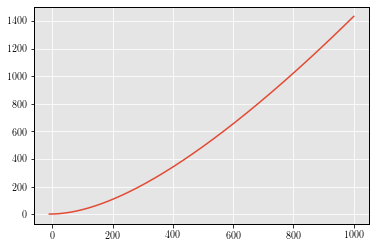

In [15]:
z = np.linspace(-zsun, 1000, 1000)
phi = Model.DM.potential(z, theta, dz=0.1)

plt.figure(figsize=(6, 4))
plt.plot(z, phi)

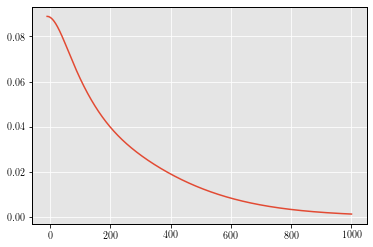

In [16]:
rhob_z = rhob_tot(phi, rhob, sigmaz)
plt.plot(z, rhob_z)

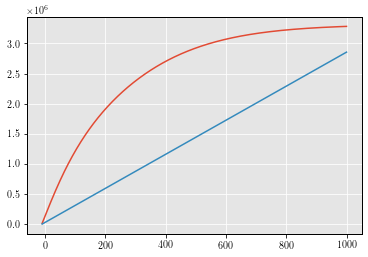

In [17]:
dz = z[1] - z[0]
A = np.pi*150**2
mass_b = np.cumsum(rhob_z)*A*dz*2
mass_dm = rhoDM*A*(z+zsun)*2

plt.figure(figsize=(6, 4))
plt.plot(z, mass_b, label="baryon")
plt.plot(z, mass_dm, label="DM")
plt.show()

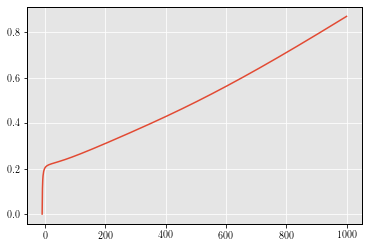

In [18]:
plt.figure(figsize=(6, 4))
plt.plot(z, mass_dm/mass_b)
plt.show()

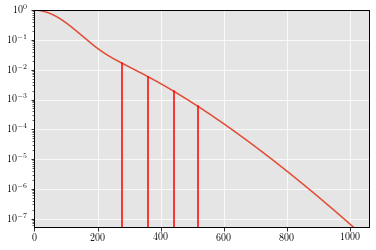

[276.030065   360.68114911 441.67216945 518.54739624]


In [19]:
from scipy.interpolate import interp1d

dz = 0.01
z = np.arange(-zsun, 1000, dz)
phi = Model.DM.potential(z, theta, dz)
z_interp = interp1d(phi, z, kind="cubic")
rhobz = rhob_tot(phi, rhob, sigmaz)

ratio = [0.35, 0.40, 0.45, 0.50] # rhoDM/rhob
num = len(ratio)
zb = np.empty(num)
rhob_z = rhob_tot(phi, rhob, sigmaz)
A = np.pi*150**2
mass_b = np.cumsum(rhob_z)*A*dz*2
mass_dm = rhoDM*A*(z+zsun)*2
ratio_interp = interp1d(mass_dm/mass_b, z, kind="linear")
zb = ratio_interp(ratio)
fz = Model.DM.fz(z, theta, dz)
fz_b = Model.DM.fz(zb, theta, dz)
plt.plot(z+zsun, fz)
for i in range(num):
    plt.plot([zb[i]+zsun, zb[i]+zsun], [0, fz_b[i]], 'r')
plt.xlim(0)
plt.ylim(fz.min())
plt.yscale("log")
plt.show()
zb = zb + zsun
print(zb)

generate...

(0.0, 1.0)

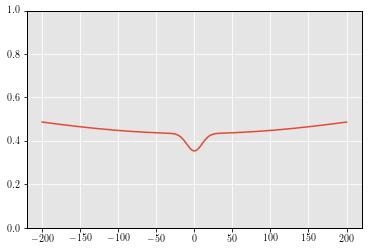

In [20]:
from scipy.stats import norm
def compz(z):
    a = -2*norm.pdf(z, loc=0, scale=10) -200*norm.pdf(z, loc=0, scale=300)
    return a+0.7

zz = np.linspace(-200, 200, 1000)

plt.plot(zz, compz(zz))
plt.ylim(0,1)


In [21]:
from tqdm import tqdm

z = chain[:, :, 0].flatten()
w = chain[:, :, 1].flatten()

ns = np.arange(1000, 50_000+1, 1000)
ns_plane = np.empty(len(ns), dtype=float)
k = 100
zbound = 50
for i, ni in enumerate(tqdm(ns)):
    v = 0
    for _ in range(k):
        sample_index = np.random.choice(len(z), ni)
        z_sample = z[sample_index]
        mask = np.abs(z_sample) < zbound
        v += mask.sum()
    # print(v/k)
    ns_plane[i] = v/k

100%|██████████| 50/50 [00:02<00:00, 22.02it/s]


array([2.07512337])

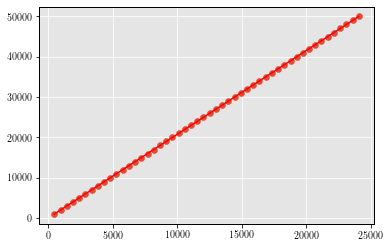

In [22]:
from scipy.optimize import curve_fit
def line(x, a):
    return a*x

popt, _ = curve_fit(line, ns_plane, ns)

plt.scatter(ns_plane, ns)
plt.plot(ns_plane, line(ns_plane, *popt), 'r')
popt

tot: 2075
plane: 1018


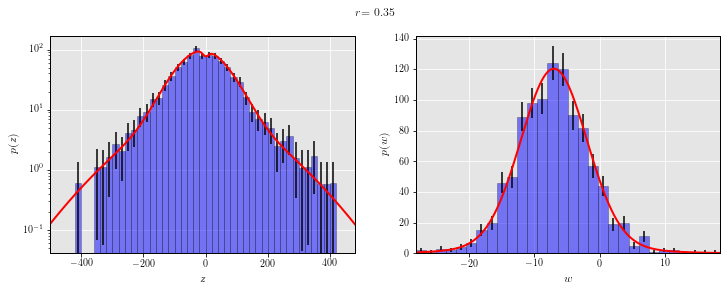

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved z_0001000.hdf5 and w_0001000.hdf5


#,mid,num,com
0,-410.0,0.5954711877429942,0.5954711877429942
1,-350.0,1.1306684192612548,0.5653342096306274
2,-330.0,1.1095304306232658,0.5547652153116329
3,-310.0,1.632184008779674,0.5440613362598913
4,-290.0,2.6665553211511384,0.5333110642302277
...,...,...,...
35,330.0,1.1095304306232658,0.5547652153116329
36,350.0,1.6960026288918821,0.5653342096306274
37,370.0,0.5756878076109562,0.5756878076109562
38,390.0,0.5857542719681283,0.5857542719681283


In [25]:
import vaex

z = chain[:, :, 0].flatten()
w = chain[:, :, 1].flatten()
zb = 500
# for i, Nw in enumerate([1000, 10_000, 100_000]):
for i, Nw in enumerate([1000]):
    ns = int(line(Nw, *popt))
    mask = np.random.choice(len(z), ns)
    z_sample = z[mask]
    w_sample = w[mask]
    zedge = np.arange(-zb, zb, 20.)
    znum, zedge = np.histogram(z_sample, bins=zedge)
    znum = znum.astype(float)
    dz = zedge[1]-zedge[0]
    zmid = (zedge[:-1]+zedge[1:])/2
    mask = znum > 0
    znum = znum[mask]
    zmid = zmid[mask]
    comp = compz(zmid)
    znum = znum*comp
    zerr = np.sqrt(znum)
    z_tot = znum.sum()*dz
    zdata = (zmid, znum)
    zs = np.linspace(zedge.min()*1.1, zedge.max()*1.1, 1000)
    comp_s = compz(zs)
    fz = Model.DM.fz(zs, theta, zs[1]-zs[0])*comp_s
    area = simps(fz, zs)
    fz = fz/(area)*z_tot

    mask = np.abs(z_sample) < 50
    nw = mask.sum()
    w_sample = w_sample[mask]
    wnum, wedge = np.histogram(w_sample, bins=30)
    wnum = wnum.astype(float)
    dw = wedge[1]-wedge[0]
    wmid = (wedge[:-1]+wedge[1:])/2
    mask = wnum > 0
    wnum = wnum[mask]
    wmid = wmid[mask]
    werr = np.sqrt(wnum)
    w_tot = wnum.sum()*dw
    ws = np.linspace(wedge.min(), wedge.max(), 1000)
    fw = Model.DM.fw(ws, theta)
    area = simps(fw, ws)
    fw = fw/area*w_tot
    wdata = (wmid, wnum)

    # plot the data
    print("tot:", ns)
    print("plane:", nw)
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    axes[0].bar(zmid, znum, yerr=zerr, width=zedge[1]-zedge[0], color='b', alpha=0.5, ec="k")
    axes[0].plot(zs, fz, color='r', lw=2)
    axes[0].set_xlabel(r'$z$')
    axes[0].set_ylabel(r'$p(z)$')
    axes[0].set_xlim(zedge.min(), zedge.max())
    axes[0].set_yscale('log')
    axes[1].bar(wmid, wnum, yerr=werr, width=wedge[1]-wedge[0], color='b', alpha=0.5, ec="k")
    axes[1].plot(ws, fw, color='r', lw=2)
    axes[1].set_xlabel(r'$w$')
    axes[1].set_ylabel(r'$p(w)$')
    axes[1].set_xlim(wedge.min(), wedge.max())
    fig.suptitle(r'$r$= {}'.format(ratio[i]))
    plt.show()
    df_z = vaex.from_arrays(mid=zmid, num=znum, com=comp)
    df_w = vaex.from_arrays(mid=wmid, num=wnum)
    df_z.export(join(root_dir, 'Data', 'MCMC-mock', 'thin', f'z_{Nw:07d}.hdf5'), progress=True)
    df_w.export(join(root_dir, 'Data', 'MCMC-mock', 'thin' , f'w_{Nw:07d}.hdf5'), progress=True)
    print(f"saved z_{Nw:07d}.hdf5 and w_{Nw:07d}.hdf5")
    # break
df_z

## thic

In [69]:
chain = np.load(join(root_data_dir, "MCMC-mock", "thic", "chain.npy"))
chain.shape

(1000000, 16, 2)

In [70]:
sigmaz = df_baryon["sigma_z"].to_numpy() # km/s
rhob = np.array(df_baryon["rho"].to_numpy())  # Msun/pc^3
rhoDM = 0.02
log_nu0 = 0
zsun = 10
R = 3.4E-3
w0 = -7
sigmaw1 = 12 # thick
sigmaw2 = 20 
log_sigmaw = np.log(sigmaw1)
q_sigmaw = sigmaw1/sigmaw2
a1 = 1
a2 = 0.1
a = a1+a2
log_a = np.log(a)
q_a = a1/a
theta = concat(sigmaz, rhob, rhoDM, log_nu0, zsun, R, w0, log_sigmaw, q_sigmaw, log_a, q_a)

In [71]:
from tqdm import tqdm

z = chain[:, :, 0].flatten()
w = chain[:, :, 1].flatten()

ns = np.arange(1000, 50_000+1, 1000)
ns_plane = np.empty(len(ns), dtype=float)
k = 100
zbound = 50
for i, ni in enumerate(tqdm(ns)):
    v = 0
    for _ in range(k):
        sample_index = np.random.choice(len(z), ni)
        z_sample = z[sample_index]
        mask = np.abs(z_sample) < zbound
        v += mask.sum()
    # print(v/k)
    ns_plane[i] = v/k

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:02<00:00, 22.04it/s]


array([4.89330516])

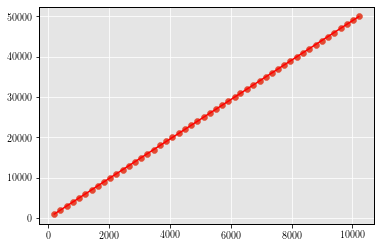

In [72]:
from scipy.optimize import curve_fit
def line(x, a):
    return a*x

popt, _ = curve_fit(line, ns_plane, ns)

plt.scatter(ns_plane, ns)
plt.plot(ns_plane, line(ns_plane, *popt), 'r')
popt

In [78]:
import json

stats = {
    'name': 'uwu'
}
stat_file = f'stats.json'
with open(stat_file, "w+") as outfile:
    json.dump(stats, outfile)

tot: 4893
plane: 1012


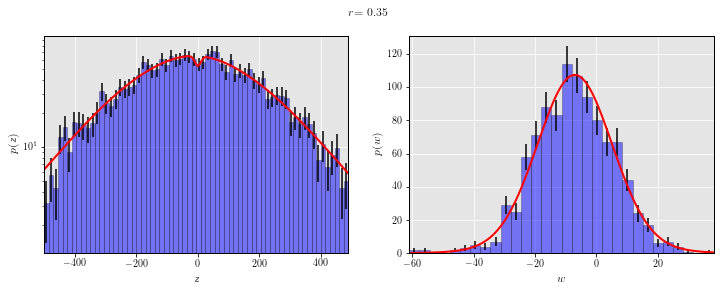

export(hdf5) [########################################] 100.00% elapsed time  :     0.03s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved z_0001000.hdf5 and w_0001000.hdf5
tot: 48933
plane: 9932


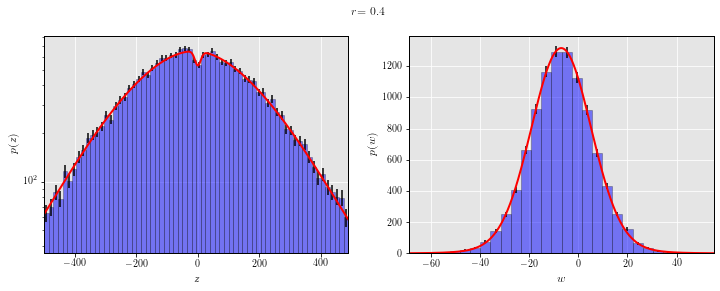

export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved z_0010000.hdf5 and w_0010000.hdf5
tot: 489330
plane: 99727


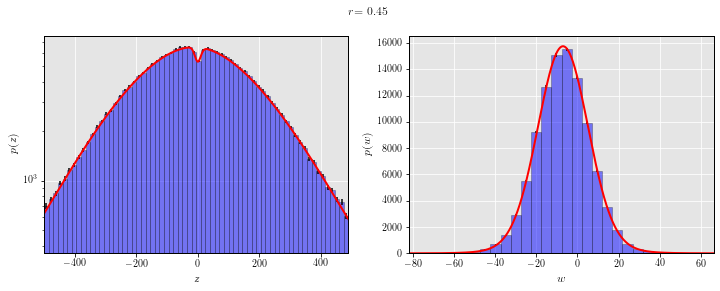

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved z_0100000.hdf5 and w_0100000.hdf5
tot: 4893305
plane: 999836


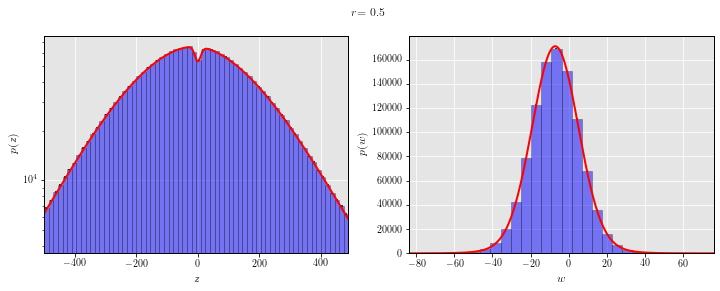

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved z_1000000.hdf5 and w_1000000.hdf5


#,mid,num,com
0,-492.5,6785.765508420499,0.630881880663862
1,-477.5,7554.509164425013,0.6250628135383927
2,-462.5,8485.896354366027,0.6189566998078794
3,-447.5,9387.051562267468,0.6125718847733926
4,-432.5,10468.472095455738,0.6059195517425328
...,...,...,...
61,422.5,9373.131709586947,0.6013428953350194
62,437.5,8323.966806828566,0.608165909755868
63,452.5,7577.7827826442735,0.6147304926295346
64,467.5,6984.651385401415,0.621023507193155


In [76]:
import vaex

z = chain[:, :, 0].flatten()
w = chain[:, :, 1].flatten()
zb = 500
for i, Nw in enumerate([1000, 10_000, 100_000, 1_000_000]):
    ns = int(line(Nw, *popt))
    mask = np.random.choice(len(z), ns)
    z_sample = z[mask]
    w_sample = w[mask]
    zedge = np.arange(-zb, zb, 15.)
    znum, zedge = np.histogram(z_sample, bins=zedge)
    znum = znum.astype(float)
    dz = zedge[1]-zedge[0]
    zmid = (zedge[:-1]+zedge[1:])/2
    mask = znum > 0
    znum = znum[mask]
    zmid = zmid[mask]
    comp = compz(zmid)
    znum = znum*comp
    zerr = np.sqrt(znum)
    z_tot = znum.sum()*dz
    zdata = (zmid, znum)
    zs = np.linspace(zedge.min()*1.1, zedge.max()*1.1, 1000)
    comp_s = compz(zs)
    fz = Model.DM.fz(zs, theta, zs[1]-zs[0])*comp_s
    area = simps(fz, zs)
    fz = fz/(area)*z_tot

    mask = np.abs(z_sample) < 50
    nw = mask.sum()
    w_sample = w_sample[mask]
    wnum, wedge = np.histogram(w_sample, bins=30)
    wnum = wnum.astype(float)
    dw = wedge[1]-wedge[0]
    wmid = (wedge[:-1]+wedge[1:])/2
    mask = wnum > 0
    wnum = wnum[mask]
    wmid = wmid[mask]
    werr = np.sqrt(wnum)
    w_tot = wnum.sum()*dw
    ws = np.linspace(wedge.min(), wedge.max(), 1000)
    fw = Model.DM.fw(ws, theta)
    area = simps(fw, ws)
    fw = fw/area*w_tot
    wdata = (wmid, wnum)

    # plot the data
    print("tot:", ns)
    print("plane:", nw)
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    axes[0].bar(zmid, znum, yerr=zerr, width=zedge[1]-zedge[0], color='b', alpha=0.5, ec="k")
    axes[0].plot(zs, fz, color='r', lw=2)
    axes[0].set_xlabel(r'$z$')
    axes[0].set_ylabel(r'$p(z)$')
    axes[0].set_xlim(zedge.min(), zedge.max())
    axes[0].set_yscale('log')
    axes[1].bar(wmid, wnum, yerr=werr, width=wedge[1]-wedge[0], color='b', alpha=0.5, ec="k")
    axes[1].plot(ws, fw, color='r', lw=2)
    axes[1].set_xlabel(r'$w$')
    axes[1].set_ylabel(r'$p(w)$')
    axes[1].set_xlim(wedge.min(), wedge.max())
    fig.suptitle(r'$r$= {}'.format(ratio[i]))
    plt.show()
    df_z = vaex.from_arrays(mid=zmid, num=znum, com=comp)
    df_w = vaex.from_arrays(mid=wmid, num=wnum)
    df_z.export(join(root_dir, 'Data', 'MCMC-mock', 'thic', f'z_{Nw:07d}.hdf5'), progress=True)
    df_w.export(join(root_dir, 'Data', 'MCMC-mock', 'thic' , f'w_{Nw:07d}.hdf5'), progress=True)
    print(f"saved z_{Nw:07d}.hdf5 and w_{Nw:07d}.hdf5")
    # break
df_z